In [1]:
#This is an example of analyzing pre-reduced data from the PINES server. 
%matplotlib inline
import pines_analysis_toolkit as pat

In [2]:
target = '2MASS J01365662+0933473' #This is SIMP J0136

In [3]:
sftp = pat.utils.pines_login() #Set up SFTP connection to PINES


Enter pines.bu.edu username: tamburop
Enter password for tamburop@pines.bu.edu: ········

Login successful!



In [4]:
pat.data.get_reduced_science_files(sftp, target) #Get reduced data for the target


Searching pines.bu.edu for reduced science files for 2MASS J01365662+0933473.




Calibrations up to date!


Found  218  raw files for  2MASS J01365662+0933473  on  2  dates.
20201104 :  105  files.
20201105 :  113  files.
Searching for reduced files.

20201104.009_red.fits already in /Users/tamburo/Documents/PINES_analysis_toolkit/Objects/2MASS 0136+0933/reduced, skipping.
20201104.010_red.fits already in /Users/tamburo/Documents/PINES_analysis_toolkit/Objects/2MASS 0136+0933/reduced, skipping.
20201104.011_red.fits already in /Users/tamburo/Documents/PINES_analysis_toolkit/Objects/2MASS 0136+0933/reduced, skipping.
20201104.012_red.fits already in /Users/tamburo/Documents/PINES_analysis_toolkit/Objects/2MASS 0136+0933/reduced, skipping.
20201104.013_red.fits already in /Users/tamburo/Documents/PINES_analysis_toolkit/Objects/2MASS 0136+0933/reduced, skipping.
20201104.014_red.fits already in /Users/tamburo/Documents/PINES_analysis_toolkit/Objects/2MASS 0136+0933/reduced, skipping.
20

20201105.447_red.fits already in /Users/tamburo/Documents/PINES_analysis_toolkit/Objects/2MASS 0136+0933/reduced, skipping.
20201105.448_red.fits already in /Users/tamburo/Documents/PINES_analysis_toolkit/Objects/2MASS 0136+0933/reduced, skipping.
20201105.449_red.fits already in /Users/tamburo/Documents/PINES_analysis_toolkit/Objects/2MASS 0136+0933/reduced, skipping.
20201105.450_red.fits already in /Users/tamburo/Documents/PINES_analysis_toolkit/Objects/2MASS 0136+0933/reduced, skipping.
20201105.451_red.fits already in /Users/tamburo/Documents/PINES_analysis_toolkit/Objects/2MASS 0136+0933/reduced, skipping.

20201104_log.txt already in /Users/tamburo/Documents/PINES_analysis_toolkit/Logs, skipping.
20201105_log.txt already in /Users/tamburo/Documents/PINES_analysis_toolkit/Logs, skipping.

No master file found on pines.bu.edu:/data/master_images/ for 2MASS J01365662+0933473.

get_reduced_science_files runtime:  0.1  minutes.
Done!



Finding sources in 20201104.260_red.fits.
....

Found 57 sources.
Found 12 suitable reference stars.



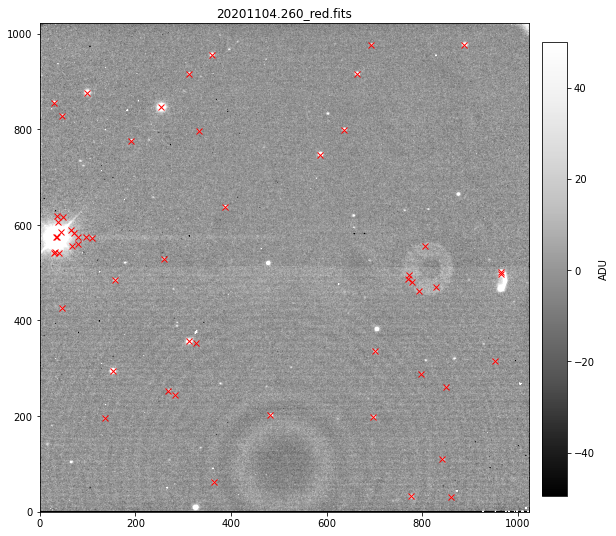

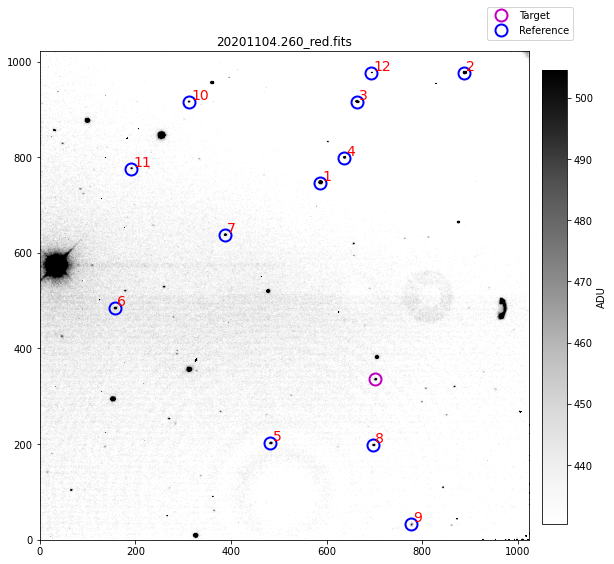

Enter IDs of references to remove, separated by commas (e.g.: 1,4,8,14).
If none to remove, hit enter:  
Happy with reference star selection? y/n: y

Saving target/reference info to /Users/tamburo/Documents/PINES_analysis_toolkit/Objects/2MASS 0136+0933/sources/target_and_references_source_detection.csv.

Saving target and references image to /Users/tamburo/Documents/PINES_analysis_toolkit/Objects/2MASS 0136+0933/sources/20201104.260_red_target_and_refs.png.


In [3]:
#Get target and reference stars. 
sources = pat.photometry.ref_star_chooser(target, source_detect_image='20201104.260_red.fits', dimness_tolerance=0.5, seeing_fwhm=2)

In [4]:
#Get centroids for target and references. 
#You can set output_plots to True to save cutouts of sources with measured centroids. 
#    WARNING: This saves n_sources * n_images plots to your computer, in the object's 'sources' folder. 
#NOTE: You can ignore "WARNING: NoDetectionsWarning: No sources were found. [photutils.segmentation.detect]"
centroided_sources = pat.photometry.centroider(target, sources, output_plots=False)


Getting centroids for 2MASS 0136+0933, source 1 of 13.


100% |########################################################################|



Getting centroids for Reference 1, source 2 of 13.


100% |########################################################################|



Getting centroids for Reference 2, source 3 of 13.


100% |########################################################################|



Getting centroids for Reference 3, source 4 of 13.


100% |########################################################################|



Getting centroids for Reference 4, source 5 of 13.


100% |########################################################################|



Getting centroids for Reference 5, source 6 of 13.


100% |########################################################################|



Getting centroids for Reference 6, source 7 of 13.


100% |########################################################################|



Getting centroids for Reference 7, source 8 of 13.


100% |########################################################################|



Getting centroids for Reference 8, source 9 of 13.


100% |########################################################################|



Getting centroids for Reference 9, source 10 of 13.


100% |########################################################################|



Getting centroids for Reference 10, source 11 of 13.


100% |########################################################################|



Getting centroids for Reference 11, source 12 of 13.


100% |########################################################################|



Getting centroids for Reference 12, source 13 of 13.


100% |########################################################################|


Saving centroiding output to /Users/tamburo/Documents/PINES_analysis_toolkit/Objects/2MASS 0136+0933/sources/target_and_references_centroids.csv.

centroider runtime: 2.29 minutes.



In [5]:
#Do simple aperture photometry with 4- and 5-pixel radius apertures.
pat.photometry.aper_phot(target, centroided_sources, [4,5])

Doing aperture photometry for 2MASS J01365662+0933473, aperture radius = 4 pix, inner annulus radius = 12.0 pix, outer annulus radius = 30.0 pix.



100% |########################################################################|


Saving ap = 4 aperture photometry output to /Users/tamburo/Documents/PINES_analysis_toolkit/Objects/2MASS 0136+0933/aper_phot/2MASS 0136+0933_aper_phot_4.0_pix_radius.csv.

Doing aperture photometry for 2MASS J01365662+0933473, aperture radius = 5 pix, inner annulus radius = 12.0 pix, outer annulus radius = 30.0 pix.



Saving ap = 5 aperture photometry output to /Users/tamburo/Documents/PINES_analysis_toolkit/Objects/2MASS 0136+0933/aper_phot/2MASS 0136+0933_aper_phot_5.0_pix_radius.csv.




In [6]:
#Make lightcurves for the target.
#pat.analysis.lightcurve normalizes reference stars and takes the median of all the normalized references in
#    each image to make the artificial comparison lightcurve ('ALC'). This does NOT do any intelligent
#    weighting of refernce star fluxes for making the ALC, which is a feature that's still under development. 

Have to add flagging bad refs.
average seeing, night 1: 2.0638095238095238
average seeing, night 2: 2.52212389380531
0.007857829084769124

> /Users/tamburo/Documents/python_programs/pines_analysis_toolkit_package/pines_analysis_toolkit/analysis/lightcurve.py(108)lightcurve()
    106 
    107     #Loop over all photometry files in the aper_phot directory.
--> 108     for i in range(len(photometry_files)):
    109         #Load in the photometry data.
    110         if phot_type =='aper':

ipdb> c
Have to add flagging bad refs.
average seeing, night 1: 2.0638095238095238
average seeing, night 2: 2.52212389380531
0.008319304365085631

> /Users/tamburo/Documents/python_programs/pines_analysis_toolkit_package/pines_analysis_toolkit/analysis/lightcurve.py(108)lightcurve()
    106 
    107     #Loop over all photometry files in the aper_phot directory.
--> 108     for i in range(len(photometry_files)):
    109         #Load in the photometry data.
    110         if phot_type =='aper':

ipdb

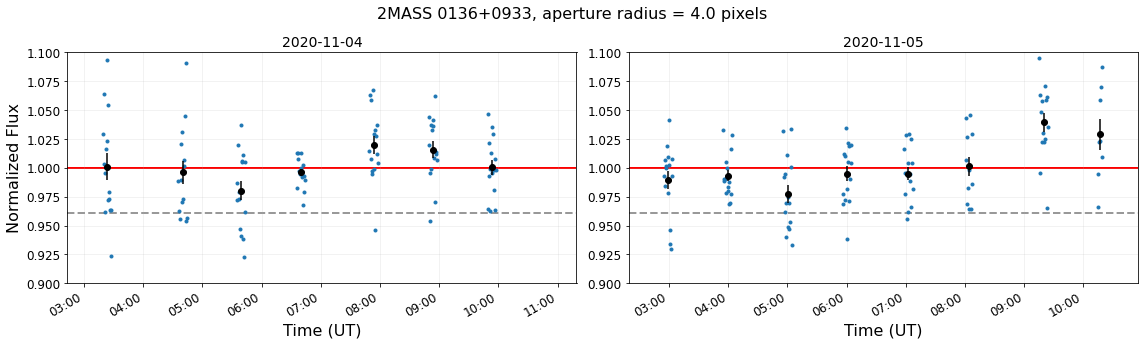

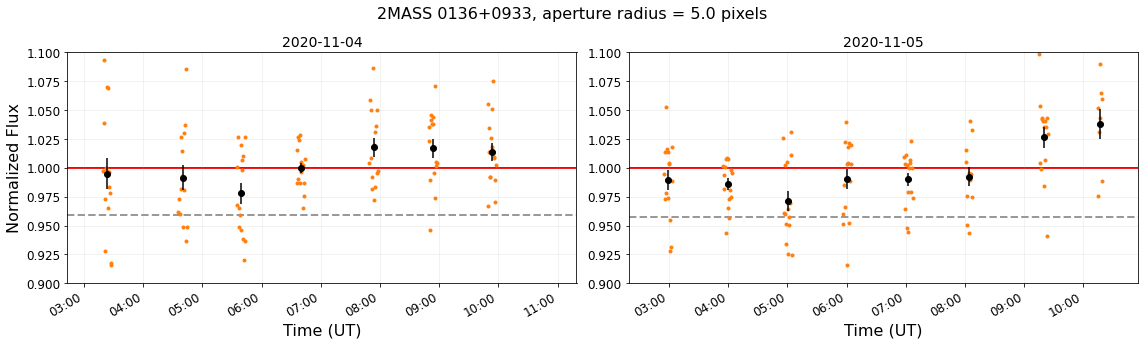

In [7]:
pat.analysis.lightcurve(target, sources, centroided_sources, phot_type='aper')